In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import matplotlib.axes as ax

In [2]:
data = pd.read_csv("E:\Data Analytics using Python\linear regression.csv")

In [3]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [4]:
data = data.dropna()

In [5]:
data.shape

(699, 2)

In [6]:
#training input and output
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

#testing input and output
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:699]).reshape(199,1)

In [7]:

print(train_input.shape)
print(train_output.shape)
print(test_input.shape)
print(test_output.shape)

(500, 1)
(500, 1)
(199, 1)
(199, 1)


### Linear regression

f(x)= mx +c

In [8]:
def forward_propagation(train_input , parameters):
    m = parameters["m"]
    c = parameters["c"]
    
    predictions= np.multiply(m,train_input) + c
    
    return predictions

In [9]:
def cost_function(predictions,train_output):
    cost = np.mean((train_output-predictions)**2)*0.5
    
    return cost

df = summisation(f(x)-y)/n

dm = df*x

dc = df*1

d(cost)/dm = d(cost)/df*df/dm

In [10]:
def backward_propagation(train_input,train_output,predictions):
    derivatives = dict()
    df = predictions- train_output
    dm = np.mean(np.multiply(df,train_input))
    dc = np.mean(df)
    
    derivatives ["dm"] = dm
    derivatives["dc"]= dc
    
    return derivatives

m' = m- (learning rate *dm)

c' = c- (learning rate * dc)

In [11]:
def update_parameters(parameters,derivatives,learning_rate):
    parameters['m']= parameters['m']-learning_rate*derivatives["dm"]
    parameters['c']= parameters['c']-learning_rate*derivatives['dc']
    return parameters

In [12]:
def train(train_input,train_output,learning_rate,iters):
    #random parameters
    parameters = dict()
    parameters['m'] = np.random.uniform(0,1)
    parameters['c']=  np.random.uniform(0,1)
    
    plt.figure()
    
#loss
    loss = list()
#iteration
    for i  in range(iters):
        #forward propagation
        predictions = forward_propagation(train_input,parameters)
        
        #cost function
        cost = cost_function(predictions,train_output)
        
        loss.append(cost)
        
        print(f"iteration = {i+1},loss = {cost}")
        
        #plot
        
        fig,ax = plt.subplots()
        ax.plot(train_input,train_output,"+",label="original")
        ax.plot(train_input,predictions,"*",label = "training")
        legend = ax.legend
        
        plt.plot(train_input,train_output,"+",label="original")
        plt.plot(train_input,predictions,"*",label = "training")
        
#back propagation
        derivatives = backward_propagation(train_input,train_output,predictions)
# update parameters
        parameters = update_parameters(parameters,derivatives,learning_rate)
    return parameters
      
        

iteration = 1,loss = 639.0755356662922
iteration = 2,loss = 292.1733425598385
iteration = 3,loss = 134.78342887954946
iteration = 4,loss = 63.37544628674576
iteration = 5,loss = 30.97756106568746
iteration = 6,loss = 16.27860023160454
iteration = 7,loss = 9.609660996173355
iteration = 8,loss = 6.583951454656118
iteration = 9,loss = 5.211179260881856
iteration = 10,loss = 4.58834657286294
iteration = 11,loss = 4.305762269491926
iteration = 12,loss = 4.177549035331602
iteration = 13,loss = 4.11937412648271
iteration = 14,loss = 4.0929756836277305
iteration = 15,loss = 4.080994258813878
iteration = 16,loss = 4.075553851276918
iteration = 17,loss = 4.073081110746329
iteration = 18,loss = 4.071954804246369
iteration = 19,loss = 4.071439376580193
iteration = 20,loss = 4.071201105540247


C:\Users\Acer\AppData\Local\Temp\ipykernel_16060\210970785.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots()


<Figure size 640x480 with 0 Axes>

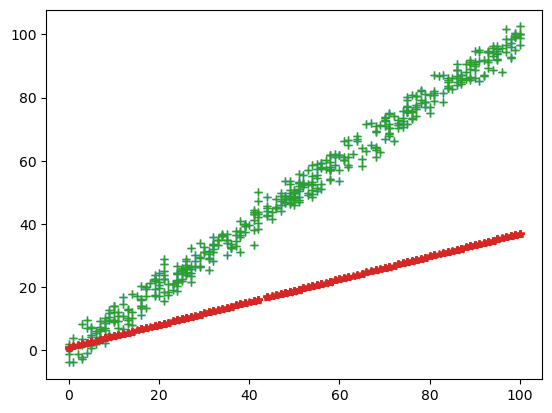

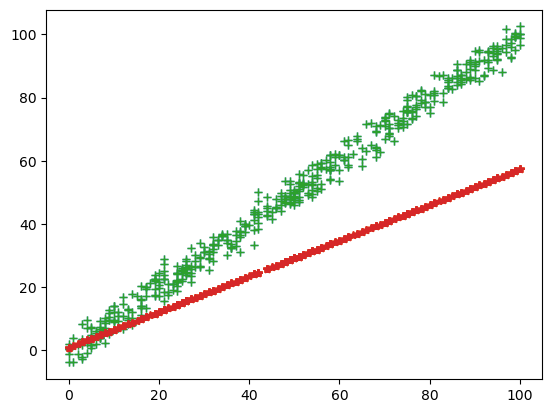

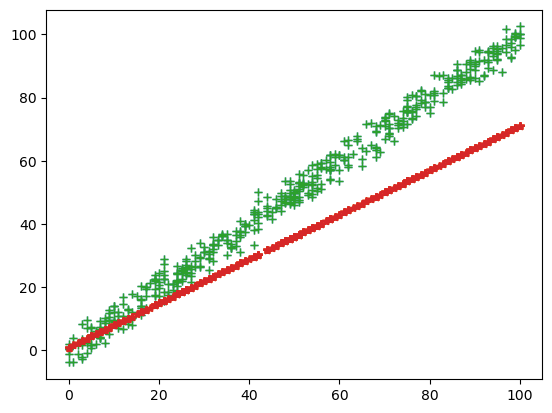

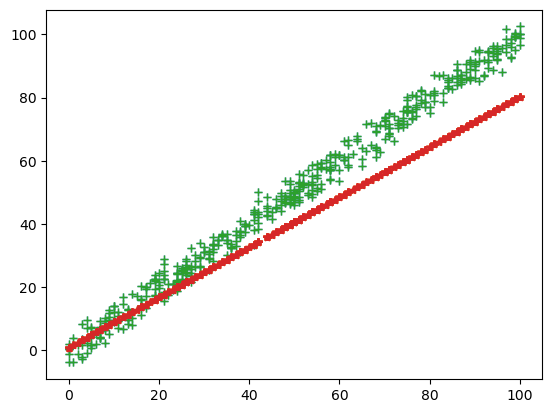

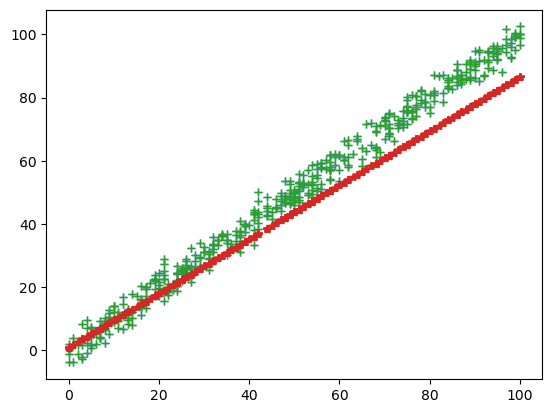

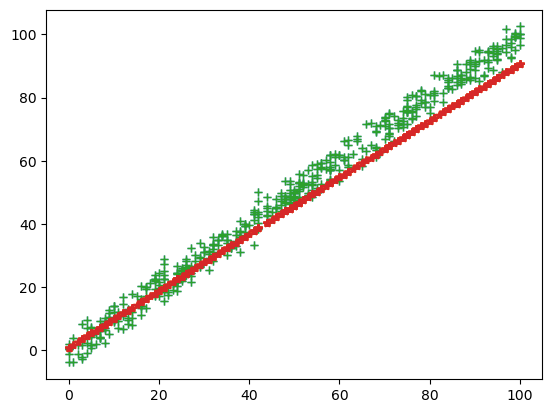

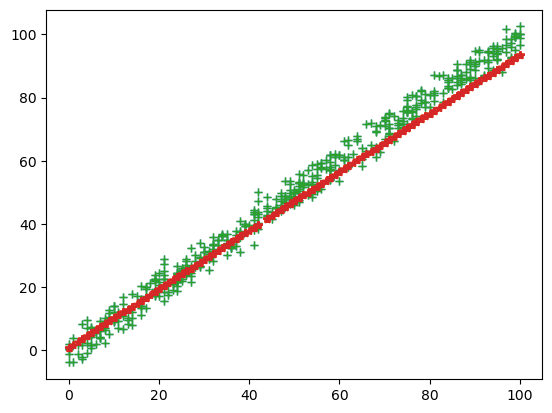

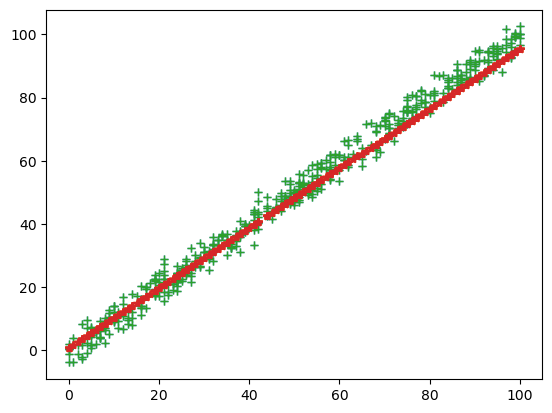

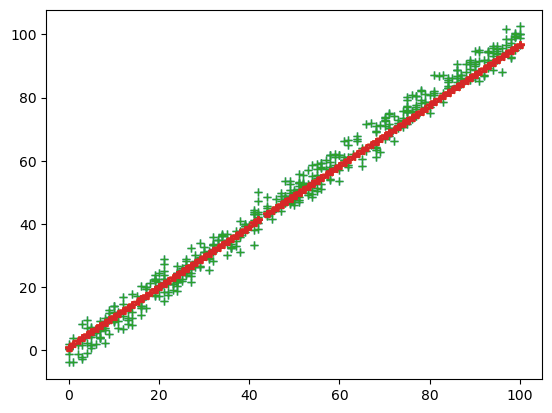

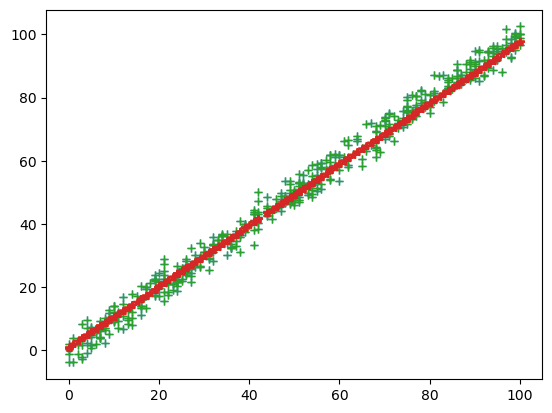

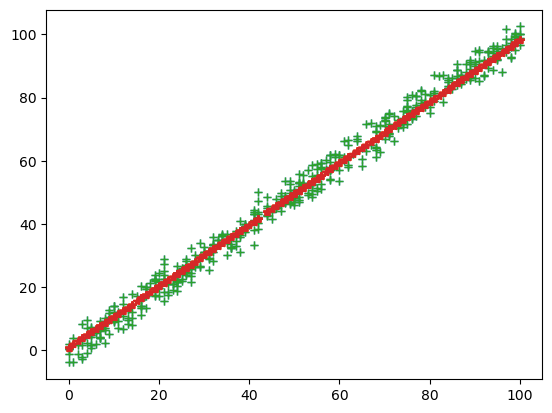

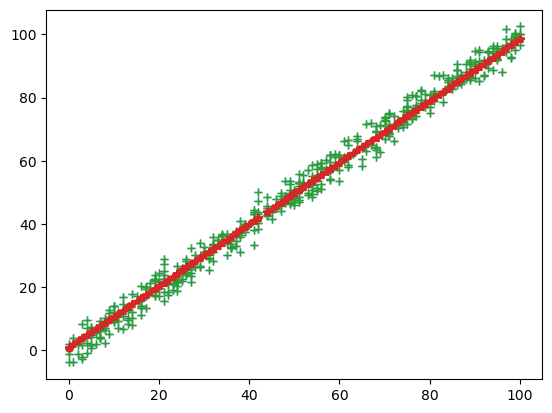

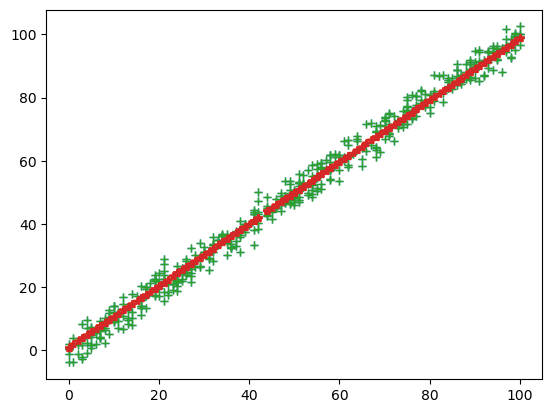

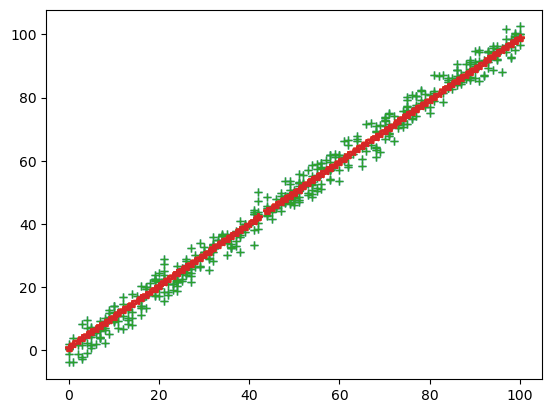

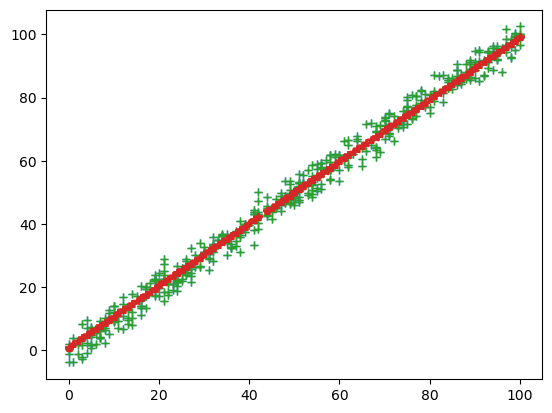

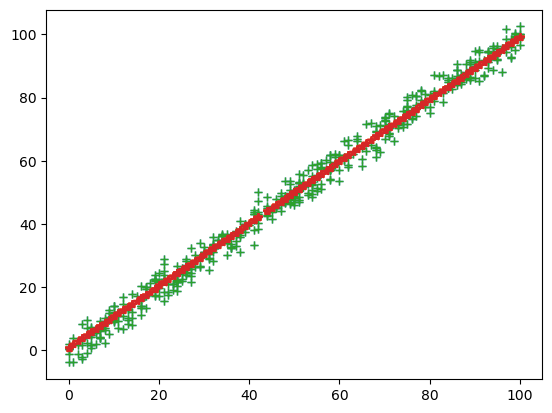

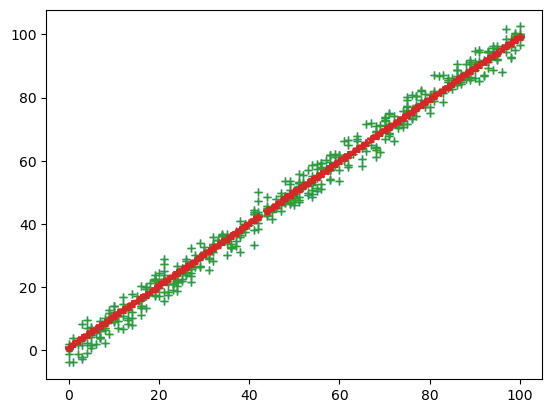

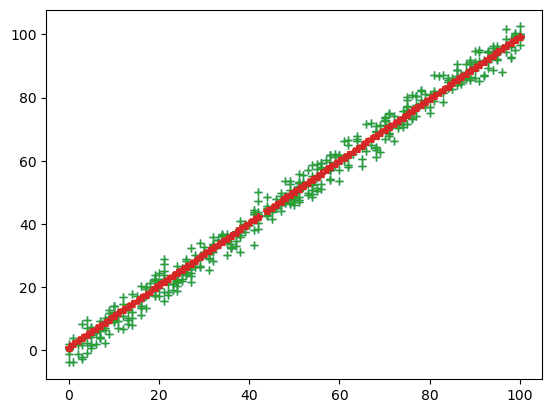

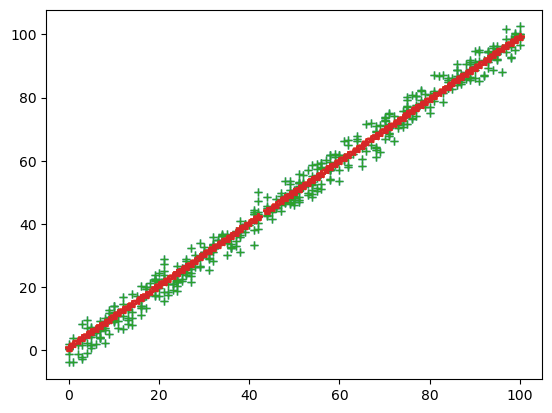

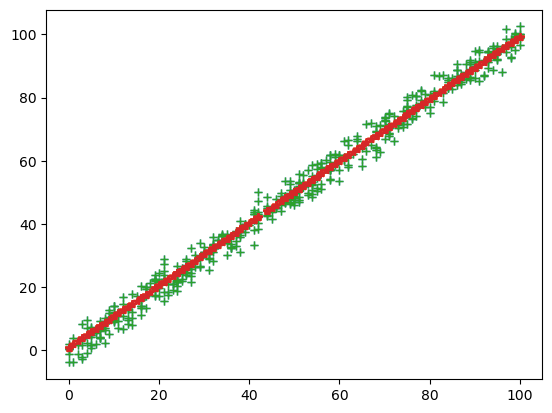

In [13]:
parameters,loss = train(train_input,train_output,0.0001,20)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr_model = LinearRegression()

In [16]:
lr_model.fit(train_input,train_output)

LinearRegression()

In [17]:
lr_model.coef_

array([[1.0009993]])

In [18]:
lr_model.intercept_

array([-0.23603461])

<function matplotlib.pyplot.show(close=None, block=None)>

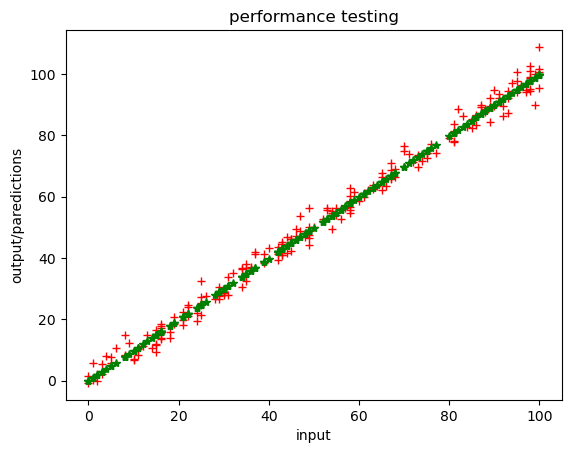

In [19]:
test_predictions = lr_model.predict(test_input)
plt.plot(test_input,test_output,"+",color ="red")
plt.plot(test_input,test_predictions,"*",color = "green")
plt.title("performance testing")
plt.xlabel("input")
plt.ylabel("output/paredictions")
plt.show

In [20]:
from sklearn.metrics import mean_squared_error
cost = mean_squared_error(test_output,test_predictions)
cost

8.030031591835375